# Woche 9: Machine Learning 1 - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten ML-Konzepte kennengelernt haben, wenden Sie Ihr erstes Machine Learning Modell auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Entscheiden Sie zunächst, ob Ihr Problem ein Classification- oder Regression-Problem ist
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus den Slides
- Evaluieren Sie Ihr Modell und dokumentieren Sie (ganz wichtig!) die Ergebnisse

**Wichtig:** Machine Learning ist optional für Ihr Projekt! Wenn Ihr Datensatz oder Ihre Forschungsfrage sich nicht für ML eignet, können Sie diese Woche auch überspringen und sich auf Visualisierungen und Streamlit konzentrieren.

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`
- Importieren Sie sklearn Module: `train_test_split`, verschiedene Modelle, Metriken
- Laden Sie Ihren bereinigten CSV-Datensatz

In [2]:
%pip install scikit-learn seaborn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Warnungen unterdrücken (optional)
import warnings
warnings.filterwarnings('ignore')

# Zufallsseed für Reproduzierbarkeit
np.random.seed(42)

# Bereinigten Datensatz einlesen
df = pd.read_csv('ai_students.csv')


---
## 2. Überblick über den Datensatz

**Aufgabe:** Verschaffen Sie sich -wie immer- einen Überblick über Ihren Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [4]:
# Dimensionen
print(f"Geladen: {df.shape}")

# Erste Zeilen
display(df.head())


# Informationen zu Spalten
print("\nInformationen zu Spalten und Datentypen:")
df.info()

# Statistische Übersicht
print("\nStatistische Übersicht numerischer Spalten:")
display(df.describe())


Geladen: (9357, 12)


,Student_ID,Student_Name,Stream,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Preferred_AI_Tool,Year_of_Study,Do_Professors_Allow_Use,Awareness_Level
0,0,aarav,engineering,gemini,0.9,assignments,2,2,copilot,4,no,9
1,0,aarav,engineering,gemini,0.9,coding help,2,2,copilot,4,no,9
2,1,vivaan,commerce,chatgpt,3.4,learning new topics,3,-3,other,2,yes,6
3,2,aditya,science,copilot,3.6,mcq practice,5,0,gemini,2,no,1
4,2,aditya,science,copilot,3.6,projects,5,0,gemini,2,no,1



Informationen zu Spalten und Datentypen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               9357 non-null   int64  
 1   Student_Name             9357 non-null   object 
 2   Stream                   9357 non-null   object 
 3   AI_Tools_Used            9357 non-null   object 
 4   Daily_Usage_Hours        9357 non-null   float64
 5   Use_Cases                9357 non-null   object 
 6   Trust_in_AI_Tools        9357 non-null   int64  
 7   Impact_on_Grades         9357 non-null   int64  
 8   Preferred_AI_Tool        9357 non-null   object 
 9   Year_of_Study            9357 non-null   int64  
 10  Do_Professors_Allow_Use  9357 non-null   object 
 11  Awareness_Level          9357 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 877.3+ KB

Statistische Übersicht numeris

,Student_ID,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Year_of_Study,Awareness_Level
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1858.153789,2.542011,3.032489,-0.012931,2.452495,5.816822
std,1085.006006,1.197440,1.452251,2.282418,1.101911,2.937864
min,0.000000,0.500000,1.000000,-5.000000,1.000000,1.000000
25%,852.000000,1.500000,2.000000,-2.000000,1.000000,3.000000
50%,1954.000000,2.600000,3.000000,0.000000,2.000000,6.000000
75%,2838.000000,3.600000,4.000000,2.000000,3.000000,8.000000
max,3613.000000,5.000000,5.000000,5.000000,4.000000,10.000000


---
## 3. ML Problem-Typ identifizieren

**Aufgabe:** Entscheiden Sie, welchen Typ von ML-Problem Sie lösen möchten. Denken Sie darüber vertieft nach und nehmen Sie sich dafür ruhig mehr Zeit!

### Classification (Klassifikation)
- **Ziel:** Kategorie vorhersagen
- **Beispiele:** 
  - Mental Health: Depression ja/nein
  - Wetter: Regentyp (leicht/mittel/stark)
  - Finanzen: Kreditrisiko (niedrig/mittel/hoch)
  - Social Media: Sentiment (positiv/negativ/neutral)
  - Kosmetik: Produktkategorie
  - Astronomie: Objekttyp (Stern/Planet/Galaxie)

### Regression
- **Ziel:** Kontinuierlichen Wert vorhersagen
- **Beispiele:**
  - Wetter: Temperatur in °C
  - Finanzen: Aktienkurs, Preis
  - Social Media: Anzahl Likes/Shares
  - Kosmetik: Produktpreis
  - Astronomie: Entfernung, Helligkeit
  - Mental Health: Depressions-Score (0-100)

**Dokumentieren Sie Ihre Entscheidung:**

### Mein ML-Problem:

**Problem-Typ:** [Classification / Regression]

**Forschungsfrage:**
- Lassen sich Studierende anhand ihres Nutzungsverhaltens und ihrer Einstellung zu KI vorhersagen, ob sich ihre Noten verbessern, verschlechtern oder gleich bleiben? Welche Faktoren haben dabei den stärksten Einfluss?

**Target-Variable (y):**
- Spaltenname: Impact_on_Grades
- Typ: int64 
- Bedeutung: Skala -5 bis +5 für die Wahrnehmung des Einfluss auf die Noten

**Mögliche Features (X):**
- Daily_Usage_Hours (Wie viel wird es genutzt?)
- Trust_in_AI_Tools (Wie sehr vertraut man der KI?)
- Stream (Studienfach)
- Year_of_Study (Erfahrung im Studium)

---
## 4. Features (X) und Target (y) definieren

**Aufgabe:** Wählen Sie Ihre Features und Target-Variable aus.

**Wichtige Hinweise:**
- **Features (X):** Sollten numerisch sein (kategoriale Features müssen später encodiert werden)
- **Target (y):** 
  - Bei Classification: Kategoriale Variable (z.B. 'ja'/'nein', 'Typ A'/'Typ B'/'Typ C')
  - Bei Regression: Numerische Variable (z.B. Temperatur, Preis, Score)
- Beginnen Sie mit 2-5 Features
- Entfernen Sie Zeilen mit fehlenden Werten in Features oder Target

In [5]:
# Überprüfen Sie, welche Spalten als Features in Frage kommen
# Numerische Spalten:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerische Spalten:", list(numeric_cols))

# Kategoriale Spalten:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kategoriale Spalten:", list(categorical_cols))


Numerische Spalten: ['Student_ID', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Year_of_Study', 'Awareness_Level']
Kategoriale Spalten: ['Student_Name', 'Stream', 'AI_Tools_Used', 'Use_Cases', 'Preferred_AI_Tool', 'Do_Professors_Allow_Use']


In [6]:
# Features (X) und Target (y) definieren

df_model = df.drop_duplicates(subset='Student_ID') #wieder zu 3611 einträgem

# Beispiel für Classification:
X = df_model[['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study']]
y = df_model['Impact_on_Grades']

# Beispiel für Regression:
# X = df[['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study', 'Stream']]
# y = df['Impact_on_Grades']

# Fehlende Werte entfernen
df_model = df_model[['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study', 'Impact_on_Grades']].dropna()
X = df_model[['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study']]
y = df_model['Impact_on_Grades']

print(f"Anzahl Samples: {len(X)}")
print(f"Anzahl Features: {X.shape[1]}")
print(f"\nTarget-Verteilung:")
print(y.value_counts())  # Für Classification
#print(y.describe())  # Für Regression


Anzahl Samples: 3611
Anzahl Features: 3

Target-Verteilung:
Impact_on_Grades
 2    523
 1    477
 0    464
-3    462
-2    445
-1    445
 3    419
-4    110
 4     93
 5     89
-5     84
Name: count, dtype: int64


---
## 5. Explorative Datenanalyse (EDA) für ML

**Aufgabe:** Untersuchen Sie die Beziehung zwischen Features und Target.

**Für Classification:**
- Boxplots: Features nach Target-Kategorien
- Visualisieren Sie, ob sich die Klassen unterscheiden

**Für Regression:**
- Scatter Plots: Features vs. Target
- Korrelation zwischen Features und Target

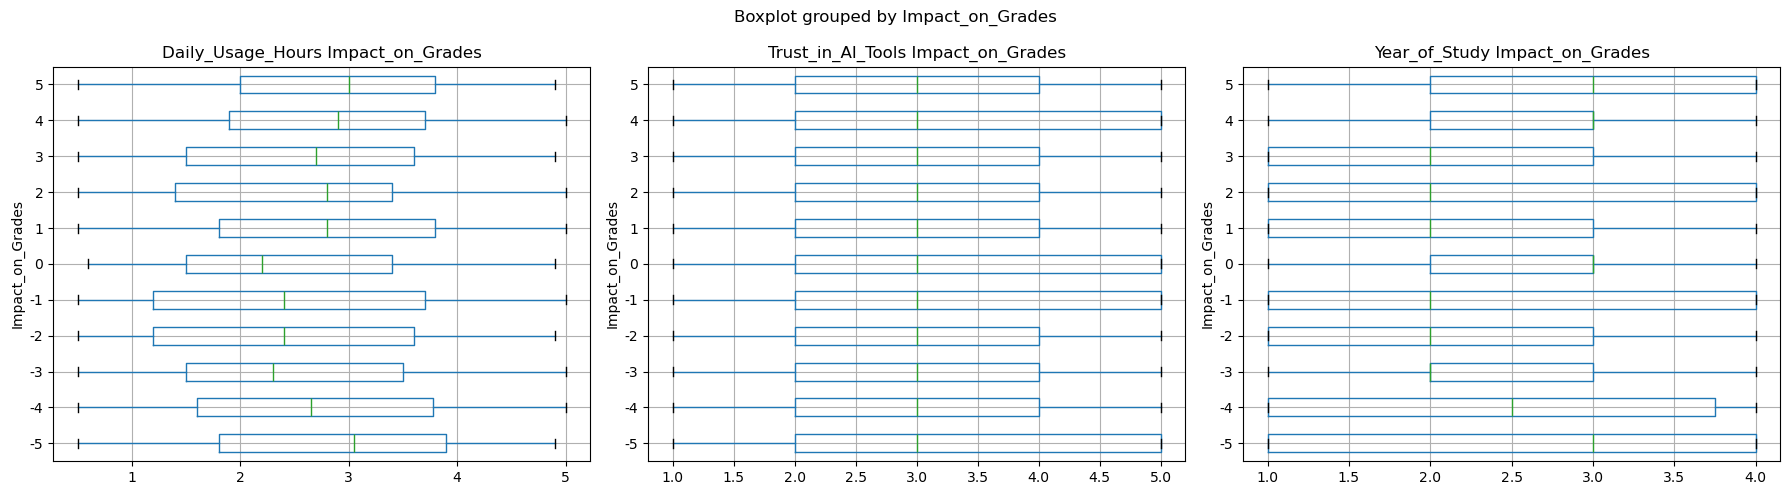

In [7]:
# Beispiel für Classification: Boxplots
fig, axes = plt.subplots(1, len(X.columns), figsize=(18, 5))
numeric_features = ['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study']
for i, col in enumerate(numeric_features):
    df_model.boxplot(column=col, by='Impact_on_Grades', ax=axes[i], vert=False)
    axes[i].set_title(f'{col} Impact_on_Grades')
plt.tight_layout()
plt.show()


In [8]:
# # Beispiel für Regression: Scatter Plots
# fig, axes = plt.subplots(1, len(X.columns), figsize=(18, 5))
# for i, col in enumerate(X.columns):
#     axes[i].scatter(df_model[col], y, alpha=0.5)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Impact_on_Grades')
#     axes[i].set_title(f'{col} vs Impact_on_Grades')
# plt.tight_layout()
# plt.show()


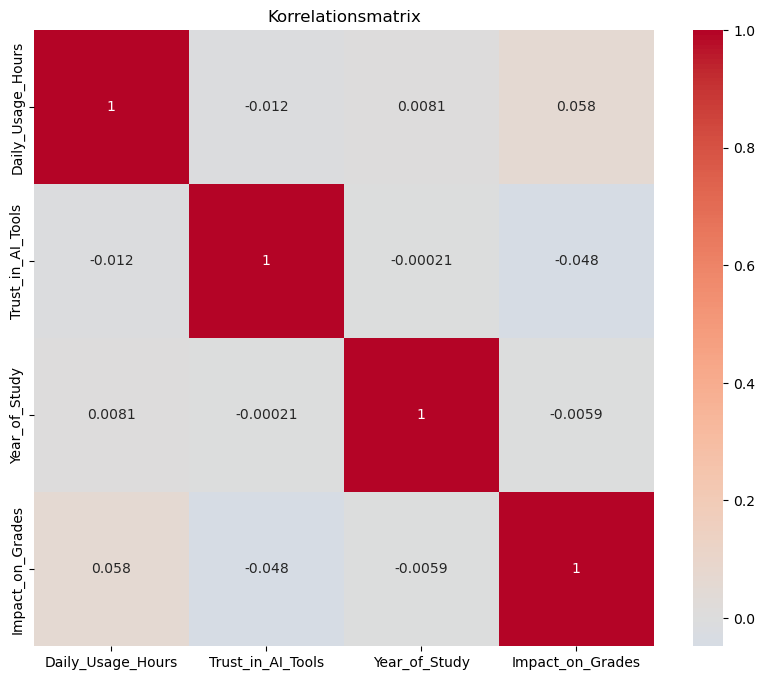

In [9]:
# Optional: Korrelationsmatrix (für Regression)
df_model_corr = df_model[['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study', 'Impact_on_Grades']].copy()
correlation_matrix = df_model_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix')
plt.show()


**Ihre Beobachtungen:**
- Welche Features scheinen am wichtigsten?
- Gibt es klare Muster?
- ...

In [10]:
# 1 = Noten verbessert, 0 = Noten unverändert/verschlechtert
def categorize(grade):
    return 1 if grade > 0 else 0

y= df_model['Impact_on_Grades'].apply(categorize)

X= df_model[['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study']].copy()
X['Stream'] = df['Stream']
X_catego = pd.get_dummies(X, columns=['Stream']) #durch get_dummies --> 1 und 0
#print (X_catego)
X = X_catego

print("df_model:", df_model.columns.tolist())


df_model: ['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study', 'Impact_on_Grades']


---
## 6. Train/Test Split

**Aufgabe:** Teilen Sie Ihre Daten in Trainings- und Testdaten auf.

**Warum?** 
- Training Set (80%): Modell lernt hier
- Test Set (20%): Modell wird hier evaluiert
- Verhindert Overfitting!

**Wichtig:** Testen Sie das Modell NIEMALS auf Trainingsdaten!

In [11]:
# Train/Test Split
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, 
    y,
    test_size=0.2,    
    random_state=42,
    stratify=y
)

print(f"Training Set: {len(X_train)} samples")
print(f"Test Set: {len(X_test)} samples")
print(f"\nTraining Set - Target Verteilung:")
print(y_train_binary.value_counts())  # Für Classification
# print(y_train.describe())  # Für Regression


Training Set: 2888 samples
Test Set: 723 samples

Training Set - Target Verteilung:
Impact_on_Grades
0    1608
1    1280
Name: count, dtype: int64


---
## 7A. ML Modelle - CLASSIFICATION

**⚠️ Nur für Classification-Probleme! Überspringen Sie diese Sektion, wenn Sie Regression machen.**

**Aufgabe:** Trainieren Sie verschiedene Classification-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Nearest Centroid Classifier (NCC) - sehr einfach
2. K-Nearest Neighbors (KNN) - ähnlich zu NCC, aber flexibler
3. Decision Tree - findet Regeln automatisch
4. Logistic Regression - trotz Namen für Classification!

In [12]:
# Classification Algorithmen importieren
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# 1. Nearest Centroid Classifier
print("=== Nearest Centroid Classifier ===")
ncc = NearestCentroid()
ncc.fit(X_train, y_train_binary)
y_pred_ncc = ncc.predict(X_test)
accuracy_ncc = accuracy_score(y_test_binary, y_pred_ncc)
print(f"Accuracy: {accuracy_ncc:.2%}\n")


=== Nearest Centroid Classifier ===
Accuracy: 54.50%



In [14]:
# 2. K-Nearest Neighbors
print("=== K-Nearest Neighbors (KNN) ===")
knn = KNeighborsClassifier(n_neighbors=5) #immer 5 nachbarn befragen
knn.fit(X_train, y_train_binary)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2%}\n")


#guckt auf direkte nachbaarn


=== K-Nearest Neighbors (KNN) ===
Accuracy: 66.11%



In [15]:
# 3. Decision Tree
print("=== Decision Tree ===")
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train_binary)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test_binary, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2%}\n")


=== Decision Tree ===
Accuracy: 61.27%



In [16]:
# 4. Logistic Regression
print("=== Logistic Regression ===")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train_binary)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test_binary, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.2%}\n")


=== Logistic Regression ===
Accuracy: 57.81%




=== Modellvergleich ===
              Model  Accuracy
                KNN  0.661134
      Decision Tree  0.612725
Logistic Regression  0.578147
   Nearest Centroid  0.544952


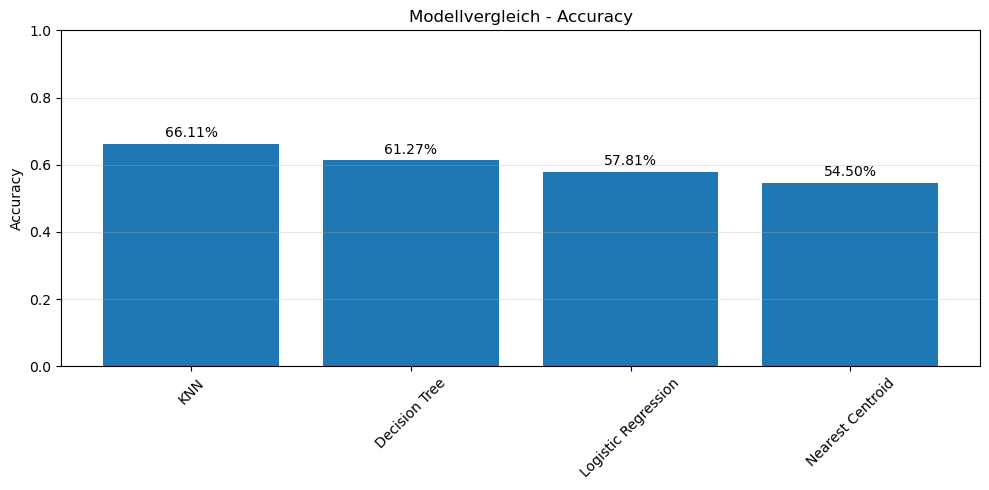

In [17]:
# Modellvergleich
results = pd.DataFrame({
    'Model': ['Nearest Centroid', 'KNN', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [accuracy_ncc, accuracy_knn, accuracy_tree, accuracy_logreg]
})
results = results.sort_values('Accuracy', ascending=False)
print("\n=== Modellvergleich ===")
print(results.to_string(index=False))

# Visualisierung
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Accuracy'])
plt.title('Modellvergleich - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center')
plt.tight_layout()
plt.show()


---
## 7B. ML Modelle - REGRESSION

**⚠️ Nur für Regression-Probleme! Überspringen Sie diese Sektion, wenn Sie Classification gemacht haben.**

**Aufgabe:** Trainieren Sie verschiedene Regression-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Linear Regression - einfache Gerade
2. K-Nearest Neighbors Regressor - Nachbarn-Durchschnitt
3. Decision Tree Regressor - findet nicht-lineare Muster
4. Random Forest Regressor - viele Bäume = robuster

In [18]:
# Regression Algorithmen importieren
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [19]:
# # 1. Linear Regression
# print("=== Linear Regression ===")
# lr = LinearRegression()
# lr.fit(X_train, y)
# y_pred_lr = lr.predict(X_test)
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# rmse_lr = np.sqrt(mse_lr)
# r2_lr = r2_score(y_test, y_pred_lr)
# print(f"RMSE: {rmse_lr:.2f}")
# print(f"R² Score: {r2_lr:.2%}\n")


In [20]:
# # 2. K-Nearest Neighbors Regressor
# print("=== K-Nearest Neighbors Regressor ===")
# knn_reg = KNeighborsRegressor(n_neighbors=5)
# knn_reg.fit(X_train, y_train)
# y_pred_knn = knn_reg.predict(X_test)
# mse_knn = mean_squared_error(y_test, y_pred_knn)
# rmse_knn = np.sqrt(mse_knn)
# r2_knn = r2_score(y_test, y_pred_knn)
# print(f"RMSE: {rmse_knn:.2f}")
# print(f"R² Score: {r2_knn:.2%}\n")


In [21]:
# # 3. Decision Tree Regressor
# print("=== Decision Tree Regressor ===")
# tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
# tree_reg.fit(X_train, y_train)
# y_pred_tree = tree_reg.predict(X_test)
# mse_tree = mean_squared_error(y_test, y_pred_tree)
# rmse_tree = np.sqrt(mse_tree)
# r2_tree = r2_score(y_test, y_pred_tree)
# print(f"RMSE: {rmse_tree:.2f}")
# print(f"R² Score: {r2_tree:.2%}\n")


In [22]:
# # 4. Random Forest Regressor
# print("=== Random Forest Regressor ===")
# rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# rmse_rf = np.sqrt(mse_rf)
# r2_rf = r2_score(y_test, y_pred_rf)
# print(f"RMSE: {rmse_rf:.2f}")
# print(f"R² Score: {r2_rf:.2%}\n")


In [23]:
# # Modellvergleich
# results = pd.DataFrame({
#     'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree', 'Random Forest'],
#     'RMSE': [rmse_lr, rmse_knn, rmse_tree, rmse_rf],
#     'R² Score': [r2_lr, r2_knn, r2_tree, r2_rf]
# })
# results = results.sort_values('R² Score', ascending=False)
# print("\n=== Modellvergleich ===")
# print(results.to_string(index=False))

# # Visualisierung
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# # RMSE
# ax1.bar(results['Model'], results['RMSE'])
# ax1.set_title('Modellvergleich - RMSE (niedriger = besser)')
# ax1.set_ylabel('RMSE')
# ax1.tick_params(axis='x', rotation=45)
# ax1.grid(axis='y', alpha=0.3)

# # R² Score
# ax2.bar(results['Model'], results['R² Score'])
# ax2.set_title('Modellvergleich - R² Score (höher = besser)')
# ax2.set_ylabel('R² Score')
# ax2.set_ylim(0, 1)
# ax2.tick_params(axis='x', rotation=45)
# ax2.grid(axis='y', alpha=0.3)
# for i, v in enumerate(results['R² Score']):
#     ax2.text(i, v + 0.02, f'{v:.2%}', ha='center')

# plt.tight_layout()
# plt.show()


---
## 8. Detaillierte Evaluation - Classification

**⚠️ Nur für Classification!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **Accuracy:** Anteil korrekter Vorhersagen
- **Confusion Matrix:** Welche Fehler macht das Modell?
- **Classification Report:** Precision, Recall, F1-Score pro Klasse

In [24]:
# Wählen Sie Ihr bestes Modell aus Sektion 7A
best_model = knn  # Beispiel
y_pred_best = y_pred_knn

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test_binary, y_pred_best))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       402
           1       0.64      0.53      0.58       321

    accuracy                           0.66       723
   macro avg       0.66      0.65      0.65       723
weighted avg       0.66      0.66      0.66       723



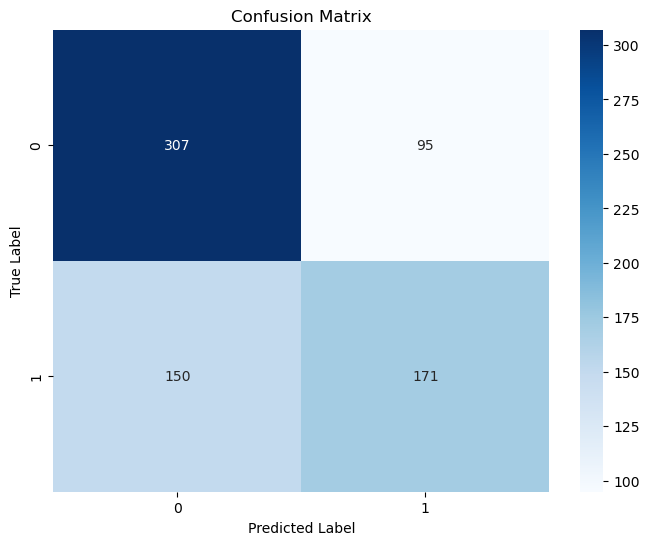

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Interpretation der Confusion Matrix:**
- Diagonale: Korrekte Vorhersagen
- Das Modell hat 307 Fälle korrekt als Nicht verbessert (0) identifiziert.Das Modell hat 171 Fälle korrekt als Verbessert (1) identifiziert. Gesamt korrekte Vorhersagen: 478 (von 723 Test-Samples).

- Außerhalb der Diagonalen: 
- False Positives: Das Modell hat 95 Studierende fälschlicherweise als Verbesserer vorhergesagt, obwohl ihre Noten in Wirklichkeit nicht verbessert/verschlechtert wurden.
- False Negatives: Das Modell hat 150 Studierende fälschlicherweise als Nicht-Verbesserer vorhergesagt, obwohl ihre Noten in Wirklichkeit verbessert wurden.

- Welche Klassen werden am häufigsten verwechselt?
Die Klasse der Verbesserer wird am häufigsten verfehlt, da 150 False Negatives vorliegen. Das Modell hat Schwierigkeiten, Studierende, deren Noten sich tatsächlich verbessert haben, korrekt zu erkennen.


---
## 9. Detaillierte Evaluation - Regression

**⚠️ Nur für Regression!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **RMSE (Root Mean Squared Error):** Durchschnittlicher Fehler (in gleicher Einheit wie Target)
- **R² Score:** Wie gut erklärt das Modell die Varianz? (0-1, höher = besser)
- **Residual Plot:** Visualisierung der Fehler

In [26]:
# # Wählen Sie Ihr bestes Modell aus Sektion 7B
# # best_model = rf  # Beispiel
# # y_pred_best = y_pred_rf

# # Alle Metriken
# mse = mean_squared_error(y_test, y_pred_best)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred_best)
# r2 = r2_score(y_test, y_pred_best)

# print("=== Evaluation Metriken ===")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"R² Score: {r2:.2%}")


In [27]:
# # Visualisierung: Predicted vs. Actual
# plt.figure(figsize=(10, 5))

# # Plot 1: Predicted vs Actual
# plt.subplot(1, 2, 1)
# plt.scatter(y, y_pred_best, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Tatsächliche Werte')
# plt.ylabel('Vorhergesagte Werte')
# plt.title('Predicted vs Actual')
# plt.grid(True, alpha=0.3)

# # Plot 2: Residuals (Fehler)
# plt.subplot(1, 2, 2)
# residuals = y_test - y_pred_best
# plt.scatter(y_pred_best, residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--', lw=2)
# plt.xlabel('Vorhergesagte Werte')
# plt.ylabel('Residuals (Fehler)')
# plt.title('Residual Plot')
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()


**Interpretation:**
- **Predicted vs Actual:** Punkte sollten nahe der roten Linie liegen
- **Residual Plot:** Fehler sollten zufällig um 0 verteilt sein (kein Muster!)

---
## 10. Feature Importance (Optional)

**Aufgabe:** Finden Sie heraus, welche Features am wichtigsten sind.

**Hinweis:** Funktioniert nur für Decision Trees und Random Forests!

In [28]:
# Feature Importance für Decision Tree oder Random Forest
# Wählen Sie Ihr Tree-basiertes Modell:
# model_with_importance = tree  # oder rf, tree_reg, etc.

# importances = model_with_importance.feature_importances_
# feature_importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': importances
# }).sort_values('Importance', ascending=False)

# print("=== Feature Importance ===")
# print(feature_importance_df.to_string(index=False))

# Visualisierung
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importance')
# plt.gca().invert_yaxis()
# plt.grid(axis='x', alpha=0.3)
# plt.tight_layout()
# plt.show()


---
## 11. Vorhersagen auf neuen Daten

**Aufgabe:** Machen Sie Vorhersagen für neue, hypothetische Datenpunkte. Sie können z.B. per genAI neue Daten

**Hinweis:** Dies zeigt, wie Ihr Modell in der Praxis verwendet werden könnte!

In [29]:
# Beispiel: Neue Datenpunkte definieren

X_train_columns = [
    'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Year_of_Study',
    'Stream_agriculture',
    'Stream_arts', 'Stream_commerce', 'Stream_engineering', 
    'Stream_hotel-management', 'Stream_law', 'Stream_management', 
    'Stream_medical', 'Stream_pharmacy', 'Stream_science'
]

new_data_dict = {
    'Daily_Usage_Hours': [4.5, 1.0],
    'Trust_in_AI_Tools': [5, 2],
    'Year_of_Study': [3, 1],
    'Stream_agriculture': [0,0], #0 oder 1 für studiengang ja nein, also 1 studi in arts einer in engineering
    'Stream_arts': [0, 1],
    'Stream_commerce': [0, 0],
    'Stream_engineering': [1, 0],
    'Stream_law': [0, 0],
    'Stream_science': [0, 0],
    'Stream_hotel-management': [0, 0],
    'Stream_management': [0, 0],
    'Stream_medical': [0, 0],
    'Stream_pharmacy': [0, 0]
}


new_data = pd.DataFrame(new_data_dict)

new_data_aligned = new_data[X_train_columns]
display(new_data_aligned)

prediction = best_model.predict(new_data_aligned)


if hasattr(best_model, 'predict_proba'):
    probabilities = best_model.predict_proba(new_data_aligned)


print("Vorhersagen")
print(f"Student 1 (Engin): Vorhersage = {'Verbessert (1)' if prediction[0] == 1 else 'Nicht verbessert (0)'}")
print(f"Student 1: Wahrscheinlichkeiten (0/1) = {probabilities[0]}")
print("---")
print(f"Student 2(Arts): Vorhersage = {'Verbessert (1)' if prediction[1] == 1 else 'Nicht verbessert (0)'}")
print(f"Student 2: Wahrscheinlichkeiten (0/1) = {probabilities[1]}")

#Vorhersage mit bestem Modell
# prediction = best_model.predict(new_data)
# print(f"Vorhersage für neue Daten: {prediction[0]}")



,Daily_Usage_Hours,Trust_in_AI_Tools,Year_of_Study,Stream_agriculture,Stream_arts,Stream_commerce,Stream_engineering,Stream_hotel-management,Stream_law,Stream_management,Stream_medical,Stream_pharmacy,Stream_science
0,4.5,5,3,0,0,0,1,0,0,0,0,0,0
1,1.0,2,1,0,1,0,0,0,0,0,0,0,0


Vorhersagen
Student 1 (Engin): Vorhersage = Nicht verbessert (0)
Student 1: Wahrscheinlichkeiten (0/1) = [0.6 0.4]
---
Student 2(Arts): Vorhersage = Verbessert (1)
Student 2: Wahrscheinlichkeiten (0/1) = [0.4 0.6]


Student 1 (Hohe Nutzung, Hohes Vertrauen, Engineering):
Vorhersage: Nicht verbessert (0)
Interpretation: Obwohl dieser Student hohe Nutzungsdauer, hohes Vertrauen aufweist, prognostiziert das Modell, dass sich die Noten höchstwahrscheinlich nicht verbessern werden. --> keine Korrelation

Student 2 (Geringe Nutzung, Geringes Vertrauen, Arts):
Vorhersage: Verbessert (1)
Interpretation: Das Modell sagt mit einer knappen Mehrheit (60%), dass sich die Noten dieses Studenten verbessern werden. 

---
## 12. Reflexion und Dokumentation

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

### Ihre Reflexion:

**1. Problem-Typ und Forschungsfrage:**
   - Welches Problem haben Sie gelöst (Classification/Regression)?
      Binäre Klassifikation. Ursprünglich als Regression (Vorhersage der Skala -5 bis +5) geplant, aber aufgrund der Datenanalyse in eine Binäre Klassifikation (Noten verbessert: Ja = 1/Nein = 0 ) umgewandelt.
   - Wie lautete Ihre Forschungsfrage?
      Lassen sich Studierende anhand ihres Nutzungsverhaltens und ihrer Einstellung zu KI vorhersagen, ob sich ihre Noten verbessern (1) oder gleich bleiben/verschlechtern (0)? Welche Faktoren sind die stärksten Einflussfaktoren

**2. Features und Target:**
   - Welche Features haben Sie verwendet?
      Daily_Usage_Hours, Trust_in_AI_Tools, Year_of_Study und Stream (umgewandelt zu 0, 1).
   - Was ist Ihre Target-Variable?
      Impact_on_Grades binär umgewandelt: 1, wenn Impact_on_Grades >= 1 (Noten verbessert), wenn Impact_on_Grades <= 0 (Noten unverändert/verschlechtert).

**3. Modellvergleich:**
   - Welches Modell hat am besten performt?
      K-Nearest Neighbors 
   - Wie gut ist die Performance (Accuracy/R²)?
      66.11%

**4. Interpretation:**
   - Welche Features sind am wichtigsten?
   Scheinbar Studiengang und Nutzungsdauer
   - Macht das Sinn für Ihr Problem?
   - Welche Fehler macht das Modell?
      Das Modell macht die meisten Fehler in Form von False Negatives (FN = 150). Es sagt also oft voraus, dass sich die Noten nicht verbessern, obwohl sie es tatsächlich getan haben.

**5. Herausforderungen:**
   - Welche Schwierigkeiten gab es?
      1. Die ursprüngliche Regression war ungeeignet.
      2. Musste Stream manuell mit pd.get_dummies() kodieren




---
## 13. Modell speichern (Optional)

**Aufgabe:** Speichern Sie Ihr bestes Modell, um es später in Streamlit zu verwenden.

**Hinweis:** Dies ist optional! Sie können auch direkt in Streamlit ein neues Modell trainieren.

In [31]:
# Modell speichern mit pickle
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Modell wurde gespeichert!")

#Später laden:
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


Modell wurde gespeichert!


---
## Zusammenfassung

**Sie haben in dieser Übung:**
- ✅ Ihr ML-Problem identifiziert (Classification/Regression)
- ✅ Features und Target definiert
- ✅ Train/Test Split durchgeführt
- ✅ Mehrere ML-Algorithmen trainiert und verglichen
- ✅ Das beste Modell evaluiert
- ✅ Feature Importance analysiert (optional)
- ✅ Vorhersagen auf neuen Daten gemacht

**Nächste Woche (Woche 10):**
- Machine Learning 2: Fortgeschrittene Evaluation
- Streamlit Einführung: Erste Web-App erstellen

**Tipp für Streamlit:**
- Nicht jedes Projekt braucht ML!
- Visualisierungen und explorative Analysen sind oft wertvoller
- Falls ML passt: Integrieren Sie Vorhersagen in Ihre App